In [3]:
import matplotlib.pyplot as plt
import yfinance as yf
import random
import numpy as np

[*********************100%***********************]  1 of 1 completed


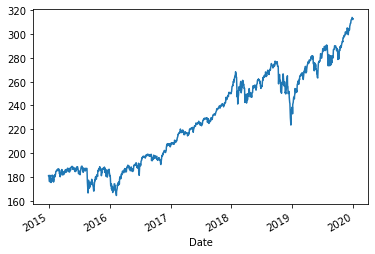

In [4]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date

data = yf.download('SPY','2015-01-01','2020-01-01')
# Plot the close prices

data["Adj Close"].plot()
plt.show()

In [5]:
data['logs'] = data["Adj Close"]/data["Adj Close"].shift(1)
data = data[['Adj Close', 'logs']]
R = data['logs'].mean()# average ret
p = data[data['logs']>1].count()['Adj Close']/data.count()['Adj Close'] #positive return freuency
R 

1.0004706971531196

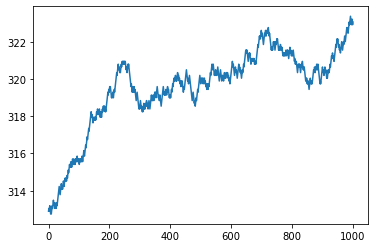

In [6]:
def incremental_walk(p):
    return 1 if random.random() < p else -1

def s_and_p_random_walk(start, horizon, p, R):
    current_price = start
    simulation = [current_price]
    for time in range(horizon):
        increment = incremental_walk(p) * (R -1)
        current_price = current_price * np.exp(increment)
        simulation.append(current_price)
    return simulation
        
simulation = s_and_p_random_walk(data.loc['2019-12-31']['Adj Close'], 1000, p, R)


plt.plot(simulation)

Text(0, 0.5, 'price')

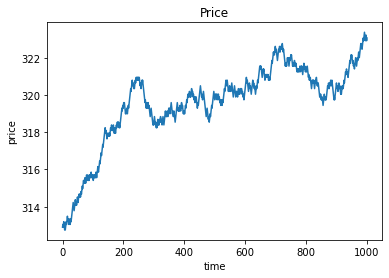

In [154]:
axs = plt.plot(simulation)
plt.title('Price')
plt.xlabel('time')
plt.ylabel('price')

In [82]:
def martingale_strategy(price, a, b, horizon):
    history = []
    last_sell = 0
    wealth = 0
    for time in range(horizon):
        curr_ret = np. log(price[time] / price[last_sell])
        history.append(wealth)
        if time>0:
            
        # case: a
            if curr_ret >= a: 
                wealth += curr_ret
                last_sell = time

        # case: b
            elif curr_ret <= b: 
                wealth += curr_ret
                last_sell = time
            
        if time == horizon-1: 
            wealth += curr_ret
            history.append(wealth)
    
    return history, wealth
    

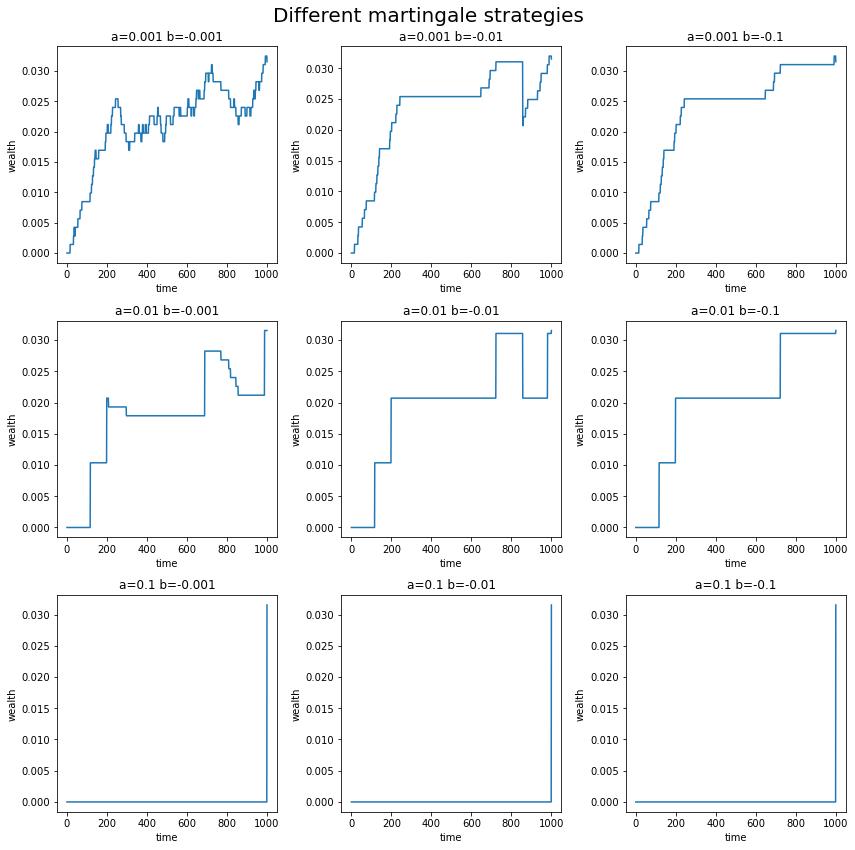

In [150]:

aandb=[(0.001,-0.001),(0.001,-0.01),(0.001,-0.1),(0.01,-0.001),(0.01,-0.01),(0.01,-0.1),(0.1,-0.001),(0.1,-0.01),(0.1,-0.1) ]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))#,sharex=True, sharey=True)
for index in range(9):
    hist, w = martingale_strategy(simulation, aandb[index][0], aandb[index][1], 1000)
    axs[int((index-index%3)/3),int(index%3) ].plot(hist)
    axs[int((index-index%3)/3),int(index%3)].set_title(f'a={(aandb[index][0])} b={aandb[index][1]}')
    axs[int((index-index%3)/3),int(index%3)].set_xlabel('time')
    axs[int((index-index%3)/3),int(index%3)].set_ylabel('wealth')

fig.suptitle('Different martingale strategies',fontsize=20 )
fig.tight_layout()
